In [1]:
import networkx as nx
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from Simulator import Simulator
from Timer import Timer
import pandas as pd

In [207]:
with Timer("build_simulator") :
    neuron_model_info_filename = "HX_model.json"
    simulator = Simulator()
    simulator.build(neuron_model_info_filename)

======================== build_simulator ==========================

Elapsed time : 0.04687500 sec 


In [3]:
simulator.one_step()

ValueError: matrices are not aligned

In [213]:
simulator.k3

In [208]:
E = simulator.d.dot( simulator.s_q.dot(simulator.x ))
V = E.dot(simulator.q)

ValueError: matrices are not aligned

In [211]:
simulator.d

,cell_in,cell_out,cell_membrane
cell_in,0.0,0.5,1.0
cell_out,0.5,0.0,1.0
cell_membrane,1.0,1.0,0.0


In [209]:
simulator.s_q.dot(simulator.x )

cell_in         -0.086
cell_out         0.132
cell_membrane   -0.001
dtype: float64

In [ ]:
simulator.s_q

In [ ]:
simulator.x

In [ ]:
simulator.material_check()

In [ ]:
simulator.d

In [ ]:
simulator.loc

In [ ]:
fl = simulator.loc.T["cell_in"]
tl = simulator.loc.T["cell_out"]

In [ ]:
((fl-tl)*(fl-tl)).sum()
math.sqrt(((fl-tl)*(fl-tl)).sum())

In [ ]:
simulator.graph_edge.keys()

In [ ]:
simulator.graph_node["na_in"].m

In [ ]:
simulator.s_matrix["na_in"]

In [ ]:
simulator.x

In [ ]:
simulator.k1

In [ ]:
simulator.k2

In [ ]:
simulator.x * simulator.x_s

In [ ]:
simulator.s_q

In [ ]:
simulator.s_q.dot(simulator.x * simulator.x_s)

In [ ]:
A = pd.Series([1,2,3], index=['a','b','c'])

In [ ]:
B = pd.DataFrame([[1,2,3],[4,5,6]], index=['x','y'], columns=['a','b','c'])

In [ ]:
B.dot(A)

In [ ]:
simulator.e_x[0]['ch_na_inactivator_activate']

In [ ]:
simulator.graph_node.keys()

In [ ]:
simulator.graph_node.keys()

In [ ]:
import pandas as pd
data = {
    'a' :[1],
    'b':[1]
}
pd_data = pd.DataFrame(data)

In [ ]:
np.array(pd_data)

In [ ]:
pd_data['b'] = pd_data['b'] + 1

In [ ]:
pd_data2 = pd_data+ pd_data2

In [ ]:
pd_data2

In [ ]:
pd_data.index

In [ ]:
A = np.array([0,1,2,3])
r = np.array([2, 0, 1])

column_indices = np.array([ 
    [0,0,1],
    [2,0,0],
    [0,3,0]
])

A[column_indices]

In [ ]:

np.dot(np.transpose(A) ,A)

In [ ]:
A

In [203]:
s = 100
a_in = 150 * s
a_out = 5 * s
a = np.zeros(20) + 5
a[0] = 100
dt = 0.1
da = np.zeros(20)
E=-0.02


k_e = np.zeros((20,20))
for i in range(20) :
    for j in range(20) :
        if i==j :
            k_e[i][j] = 0
        elif i<j :
            k_e[i][j] = -1
        elif i>j :
            k_e[i][j] = 1

def one() :
    global a
    
    # diff
    da =  dt * np.concatenate((a[1:], np.zeros(1)), axis=0)
    da = da - dt * np.concatenate(( np.zeros(1), a[1:]), axis=0)
    da = da -  dt * np.concatenate((a[:-1], np.zeros(1)), axis=0)
    da =  da+ dt * np.concatenate((np.zeros(1), a[:-1]), axis=0)
    
    # ohm
    #E = (np.dot(k_e, a) - 500)/1000
    #print(E)
    e_m = dt * np.concatenate(( np.zeros(1), a[1:]), axis=0)* -E
    da_e = np.concatenate((e_m[1:], np.zeros(1)), axis=0)
    da_e = da_e - e_m
    
    
    a = a+da+ da_e
    #a = a+da
    
for i in range(10000) :
    one()

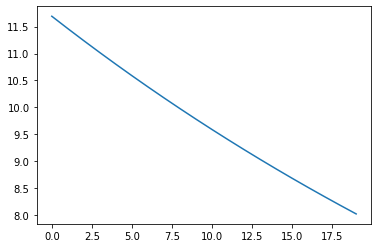

In [204]:
plt.plot(a)

In [205]:
-E/ np.log(a[0]/a[19])

0.053156157672477784

In [206]:
0.05773489418681217

0.05773489418681217